In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


In [ ]:
#Access dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
print(x_train.shape)
print(x_test.shape)
#y_train = x_train
#y_test = x_test

#Select one normal class
normal_digit = 0
x_train_normal = x_train[y_train==normal_digit]
x_test_normal = x_test[y_test==normal_digit]
x_test_anomaly = x_test[y_test!=normal_digit]

print("Normal Training Samples: ",x_train_normal.shape[0])
print("Normal Testing Samples: ",x_test_normal.shape[0])
print("Anomalous Testing Samples: ",x_test_anomaly.shape[0])

(60000, 784)
(10000, 784)
Normal Training Samples:  5923
Normal Testing Samples:  980
Anomalous Testing Samples:  9020


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
# from tensorflow.keras.datasets import mnist # Removed import
import numpy as np
import matplotlib.pyplot as plt
import gzip
import os

print(tf.__version__)

# Function to load MNIST images
def load_mnist_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    return data.reshape(-1, 28, 28)

# Function to load MNIST labels
def load_mnist_labels(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    return data

# Define the expected file paths in the content directory
train_images_path = '/content/train-images-idx3-ubyte.gz'
train_labels_path = '/content/train-labels-idx1-ubyte.gz'
test_images_path = '/content/t10k-images-idx3-ubyte.gz'
test_labels_path = '/content/t10k-labels-idx1-ubyte.gz'

# Check if the files exist before attempting to load
if not all([os.path.exists(train_images_path), os.path.exists(train_labels_path),
            os.path.exists(test_images_path), os.path.exists(test_labels_path)]):
    print("MNIST zip files not found in /content/. Please upload them or update the file paths.")
else:
    # Load the dataset from the downloaded files
    x_train = load_mnist_images(train_images_path)
    y_train = load_mnist_labels(train_labels_path)
    x_test = load_mnist_images(test_images_path)
    y_test = load_mnist_labels(test_labels_path)

    # Normalize data
    x_train = x_train.astype('float32') / 255
    x_test = x_test.astype('float32') / 255

    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))
    print(x_train.shape)
    print(x_test.shape)
    #y_train = x_train
    #y_test = x_test

    #Select one normal class
    normal_digit = 0
    x_train_normal = x_train[y_train==normal_digit]
    x_test_normal = x_test[y_test==normal_digit]
    x_test_anomaly = x_test[y_test!=normal_digit]

    print("Normal Training Samples: ",x_train_normal.shape[0])
    print("Normal Testing Samples: ",x_test_normal.shape[0])
    print("Anomalous Testing Samples: ",x_test_anomaly.shape[0])

(60000, 784)
(10000, 784)
Normal Training Samples:  5923
Normal Testing Samples:  980
Anomalous Testing Samples:  9020


In [ ]:
#Encoder
# Input layer
input_dim = x_train.shape[1]  # 784
encoding_dim = 32  # latent dimension

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
latent = Dense(encoding_dim, activation='relu')(encoded)


In [ ]:
#Decoder
# Decoder
decoded = Dense(64, activation='relu')(latent) #or latent
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Full Autoencoder model
autoencoder = Model(inputs = input_layer, outputs = decoded)

# Separate Encoder model (for visualization)
encoder = Model(inputs = input_layer, outputs = latent)


In [ ]:
#Compile and Train

autoencoder.compile(optimizer='adam',
                    loss='mse',  # Mean Squared Error
                    metrics=['mae', 'accuracy'])
autoencoder.summary()

history = autoencoder.fit(
    x_train_normal, x_train_normal,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_normal, x_test_normal),
    verbose=1
)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.0012 - loss: 0.1474 - mae: 0.3141 - val_accuracy: 0.0020 - val_loss: 0.0631 - val_mae: 0.1372
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0010 - loss: 0.0615 - mae: 0.1360 - val_accuracy: 0.0020 - val_loss: 0.0479 - val_mae: 0.1147
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 8.9083e-04 - loss: 0.0436 - mae: 0.1056 - val_accuracy: 0.0010 - val_loss: 0.0378 - val_mae: 0.0934
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0018 - loss: 0.0363 - mae: 0.0908 - val_accuracy: 0.0010 - val_loss: 0.0326 - val_mae: 0.0832
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0016 - loss: 0.0315 - mae: 0.0814 - val_accuracy: 0.0020 - val_loss: 0.0285 - val_mae: 0.0754
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0039 - loss: 0.0275 - mae: 0.0733 - val_accuracy: 0.0031 - val_loss: 0.0256 - val_mae: 0.0695
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 1

In [ ]:
#Evaluate Performance

reconstructions = autoencoder.predict(x_test)
reconstruction_error = np.mean(np.square(x_test - reconstructions),axis=1)
# or mse = np.mean(np.power(x_test_normal - reconstruction, 2), axis=1)
threshold = np.mean(reconstruction_error + 3*np.std(reconstruction_error))

print(f"Reconstruction Error Threshold: , {threshold: .5f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Reconstruction Error Threshold: ,  0.10477


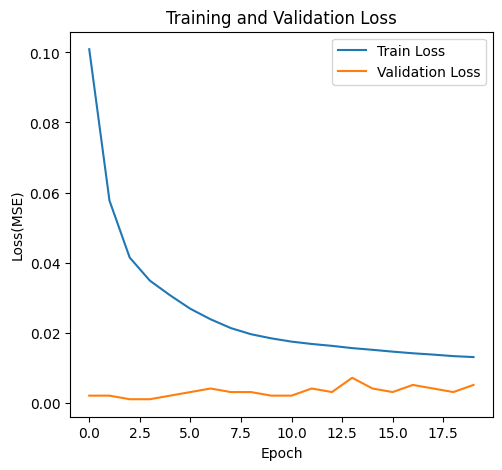

In [ ]:
#Visualizing Reconstruction Performance

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_accuracy'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss(MSE)')
plt.xlabel('Epoch')
plt.legend()

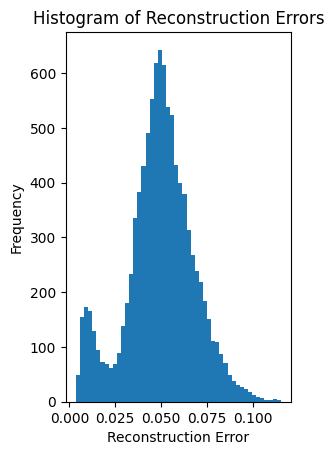

In [ ]:
#Histogram of Reconstruction Errors

plt.subplot(1,2,2)
plt.hist(reconstruction_error, bins=50)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Errors')
plt.show()


In [ ]:
#Test Autoencoder for anomaly detection

reconstruction_normal = autoencoder.predict(x_test_normal)
reconstruction_anomaly = autoencoder.predict(x_test_anomaly)
reconstruciton_error_normal = np.mean(np.square(x_test_normal - reconstruction_normal), axis=1)
reconstruciton_error_anomaly = np.mean(np.square(x_test_anomaly - reconstruction_anomaly), axis=1)
#mse_normal = np.mean(np.square(x_test_normal - reconstruction_normal), axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
#Compare Average Errors

avg_error_normal = np.mean(reconstruciton_error_normal)
avg_error_anomaly = np.mean(reconstruciton_error_anomaly)
print(f"Average Reconstruction Error for Normal Samples: {avg_error_normal: .5f}")
print(f"Average Reconstruction Error for Anomaly Samples: {avg_error_anomaly: .5f}")

Average Reconstruction Error for Normal Samples:  0.01320
Average Reconstruction Error for Anomaly Samples:  0.05343


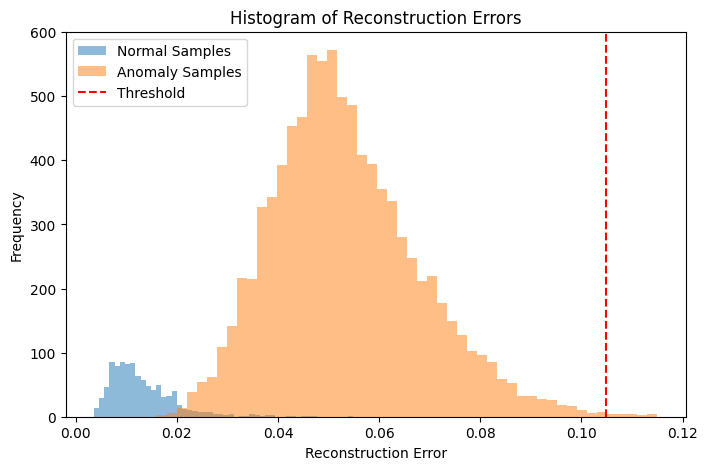

In [ ]:
# Visualize differences
plt.figure(figsize=(8, 5))
plt.hist(reconstruciton_error_normal, bins=50, alpha=0.5, label='Normal Samples')
plt.hist(reconstruciton_error_anomaly, bins=50, alpha=0.5, label='Anomaly Samples')
plt.axvline(x=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Reconstruction Errors')
plt.legend()
plt.show()

In [ ]:
def display_reconstruction(original, reconstructed, n=5):
    plt.figure(figsize=(10, 3))
    for i in range(n):
        # Display original
        plt.subplot(2, n, i +1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')
        # Display reconstruction
        plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

In [ ]:
# Display normal reonstructions
reconstructed_normal = autoencoder.predict(x_test_normal[:5])
display_reconstruction = (x_test_normal[:5], reconstructed_normal)

#Display anomalous reconstrucitons
reconstructed_anomaly = autoencoder.predict(x_test_anomaly[:5])
display_reconstruction = (x_test_anomaly[:5], reconstructed_anomaly)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
